In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [156]:
df_desmatamento = pd.read_csv('backend/data/desmatamento_ucs.csv', sep=";", encoding = 'latin-1')
df_queimadas = pd.read_csv('backend/data/areas_queimadas_uc.csv', sep=";", encoding = 'latin-1')
df_metricas = pd.read_csv('backend/data/metricas_acoes_ucs_tratado.csv', sep=";", encoding = 'latin-1')
df_metereologicos = pd.read_csv('backend/data/dados_metereologicos.csv', sep=",", encoding = 'utf-8')

In [157]:
df_metricas.merge(df_desmatamento, how="left", left_on="cnuc", right_on="codigo_da_uc")["2008"].count()

115

In [158]:
len(set(df_desmatamento["codigo_da_uc"].sort_values().unique()) & set(df_metricas["cnuc"].sort_values().unique()))

160

In [159]:
df_compilado = df_metricas.merge(df_desmatamento, left_on="cnuc", right_on="codigo_da_uc").merge(df_queimadas, left_on="cnuc", right_on="codigo_cnuc")
df_compilado.head()

,nome_da_uc_x,nota_pessoal_mean,nota_pessoal_std,nota_equipamento_mean,nota_equipamento_std,nota_capacidade_mean,nota_capacidade_std,nota_recurso_mean,nota_recurso_std,nota_apoio_mean,...,area_estimada_da_uc_(ha),bioma,area_queimada_em_2019,area_queimada_em_2018,area_queimada_em_2017,area_queimada_em_2016,area_queimada_em_2015,area_queimada_em_2014,area_queimada_em_2013,area_queimada_em_2012
0,AREA DE PROTECAO AMBIENTAL CARSTE DA LAGOA SANTA,0.6000,0.210819,0.825000,0.205818,0.975000,0.079057,0.700000,0.307318,0.175000,...,39957,CERRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AREA DE PROTECAO AMBIENTAL CAVERNAS DO PERUACU,0.2875,0.091587,0.637500,0.189789,0.675000,0.200329,0.312500,0.267481,0.375000,...,143356,CERRADO,NaN,NaN,260.7,NaN,NaN,NaN,NaN,NaN
2,AREA DE PROTECAO AMBIENTAL DA BACIA DO RIO DES...,0.3125,0.155395,0.708333,0.097312,0.708333,0.144338,0.479167,0.270906,0.541667,...,41784,CERRADO,NaN,NaN,1585.4,NaN,NaN,NaN,NaN,NaN
3,AREA DE PROTECAO AMBIENTAL DA BACIA DO RIO SAO...,0.2500,NaN,0.000000,NaN,0.250000,NaN,0.000000,NaN,0.000000,...,82681,CERRADO,NaN,NaN,1620.0,NaN,NaN,NaN,NaN,NaN
4,AREA DE PROTECAO AMBIENTAL DAS NASCENTES DO RI...,0.5000,0.125000,0.944444,0.166667,0.722222,0.231990,0.722222,0.231990,0.444444,...,176324,CERRADO,NaN,NaN,7592.3,NaN,NaN,NaN,NaN,NaN


In [160]:
df_compilado.columns

Index(['nome_da_uc_x', 'nota_pessoal_mean', 'nota_pessoal_std',
       'nota_equipamento_mean', 'nota_equipamento_std', 'nota_capacidade_mean',
       'nota_capacidade_std', 'nota_recurso_mean', 'nota_recurso_std',
       'nota_apoio_mean', 'nota_apoio_std', 'cnuc', 'bioma_x',
       'calculo_efetividade_mean', 'calculo_efetividade_std', 'Unnamed: 0_x',
       'codigo_da_uc', 'nome_da_uc_y', 'grupo', 'criacao', 'area_geo',
       'bioma_y', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', 'acum 1997', 'Unnamed: 0_y',
       'codigo_cnuc', 'nome_da_uc', 'categoria_da_uc:_sigla_federal',
       'categoria_da_uc:_nomenclatura_nacional', 'grupo_de_protecao',
       'ano_de_criacao', 'coordenacao_regional_do_icmbio',
       'area_estimada_da_uc_(ha)', 'bioma', 'area_queimada_em_2019',
       'area_queimada_em_2018', 'area_queimada_em_2017',
       'area_queima

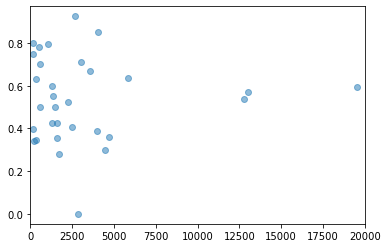

In [161]:
plt.scatter(df_compilado["area_queimada_em_2016"], df_compilado["nota_pessoal_mean"], alpha=0.5)
plt.xlim([0, 20000])
plt.show()

## ANÁLISE METEREOLÓGICO

In [162]:
df_metereologicos.columns

Index(['Unnamed: 0', 'mes', 'precipitacao_(mm)', 'pressao_atm_(mB)',
       'pressao_atm_max_hora_ant_(mB)', 'pressao_atm_min_hora_ant_(mB)',
       'temperatura_do_ar_(graus)', 'temperatura_do_ponto_de_orvalho_(graus)',
       'temperatura_max_hora_ant_(graus)', 'temperatura_min_hora_ant_(graus)',
       'temperatura_orvalho_max_hora_ant_(graus)',
       'temperatura_orvalho_min_hora_ant_(graus)',
       'umidade_relativa_max_hora_ant(%)', 'umidade_relativa_min_hora_ant(%)',
       'umidade_relativa_do_ar_(%)', 'vento_direcao_horaria',
       'vento_rajada_maxima_(m/s)', 'vento_velocidade_horaria_(m/s)',
       'estacao', 'latitude', 'longitude', 'uf', 'ano', 'uc', 'distancia_uc',
       'cod_uc'],
      dtype='object')

In [202]:
df_metereologicos["ano_mes"] = df_metereologicos["ano"].astype(str) + '/' + [('%02d' % mes) for mes in df_metereologicos["mes"]]

In [203]:
df_metricas["nome_da_uc"] = [ text.replace(' ', '_') for text in df_metricas["nome_da_uc"] ]

In [204]:
df_metricas_metereologicos = df_metricas.merge(df_metereologicos, left_on="cnuc", right_on="cod_uc")

In [205]:
df_precipitacao_mes = df_metricas_metereologicos[df_metricas_metereologicos["cod_uc"] == "0000.00.0003"][["ano", "mes", "ano_mes", "precipitacao_(mm)"]]

<AxesSubplot:>

<Figure size 1500x600 with 0 Axes>

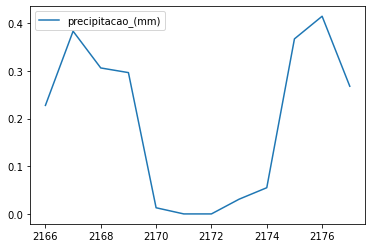

In [206]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)

df_precipitacao_mes[df_precipitacao_mes["ano"] == 2018][["ano_mes", "precipitacao_(mm)"]].plot()


Geração dos dados para grafico

In [211]:
df_precipitacao = df_metricas_metereologicos[["uc", "cod_uc", "ano", "mes", "ano_mes", "precipitacao_(mm)"]].sort_values("ano_mes")

In [213]:
df_precipitacao.to_csv('backend/data/precipitacao_por_ano_mes.csv', index=False, sep=";", encoding = 'utf-8')

In [15]:
df = pd.read_csv("backend/data/desmatamento_ucs.csv", sep=';')
uc = "RESERVA EXTRATIVISTA RIO IRIRI"
df = df.fillna(0)
x = list(range(2001, 2021))
years = [str(year) for year in x]
y = []
for year in years:
    y.append(df.loc[df["nome_da_uc"] == uc, year].values)


[1186.1,
 1186.1,
 2091.4,
 2091.4,
 997.1,
 997.1,
 1730.6,
 1730.6,
 568.8,
 568.8,
 573.4,
 573.4,
 581.7,
 1201.1,
 660.8,
 527.8,
 502.1,
 894.0,
 639.2,
 549.8499]